In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.svm import SVR

In [61]:
file='../Position_Salaries.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n',data.shape)
data.head()

Position    object
Level        int64
Salary       int64
dtype: object 
 (10, 3)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Preprocessing

In [62]:
inputs=np.array(data['Level']).reshape(data.shape[0],1)

In [63]:
# Feature scaling :
salary=data['Salary']
mean_pos=inputs.mean()
std_pos=inputs.std()
mean_salary=salary.mean()
std_salary=salary.std()
target=(salary-mean_salary)/std_salary
inputs=(inputs-mean_pos)/std_pos

### Fiting SVR Linear Kernel

In [64]:
svr=SVR(kernel='linear')
svr.fit(inputs,target)

SVR(kernel='linear')

### Plotting the results

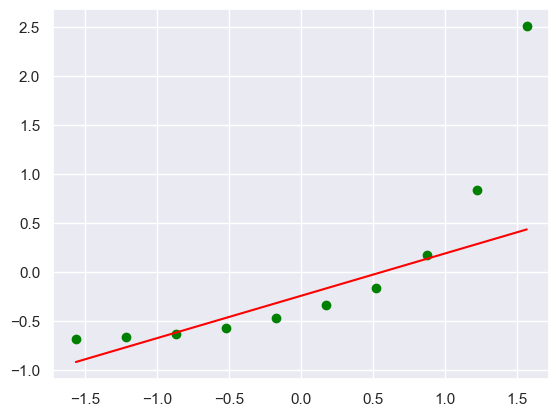

In [65]:
plt.figure()
plt.plot(inputs,svr.predict(inputs),color='red')
plt.scatter(inputs,target,color='green')
plt.show()

### RBF kernel

In [66]:
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(inputs,target)

SVR()

In [67]:
svr_rbf.predict(inputs)

array([-0.58246255, -0.59216612, -0.53431801, -0.46639211, -0.41656434,
       -0.33954643, -0.1298945 ,  0.26847654,  0.73653588,  1.02805289])

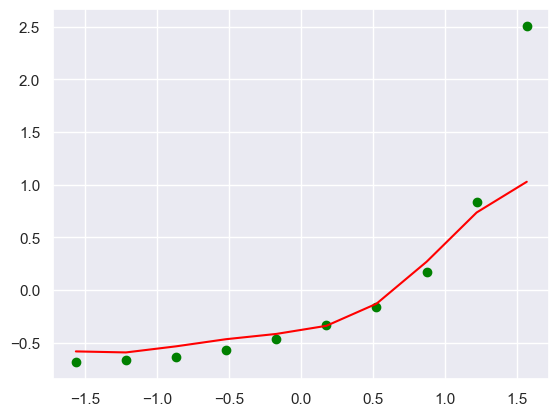

In [68]:
# plotting the results
plt.figure()
plt.plot(inputs,svr_rbf.predict(inputs),color='red')
plt.scatter(inputs,target,color='green')
plt.show()

### prediction for position {6.5}

In [73]:
position=6.5
position=np.array([position])
position=position.reshape(position.shape[0],1)
position=(position-mean_pos)/std_pos
position_pred_linear=svr.predict(position)
position_pred_rbf=svr_rbf.predict(position)

In [74]:
print((position_pred_linear*std_salary)+mean_salary)
print((position_pred_rbf*std_salary)+mean_salary)

[222280.84101012]
[172315.33620164]
